In [202]:
import pandas as pd

@author: MUSTAFA YALINIZ

In [203]:
# Veriyi oku 
data = pd.read_csv('maaslar_yeni.csv')
data

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500
5,6,Sef,6,5,70,7500
6,7,Mudur,7,5,70,10000
7,8,Direktor,8,5,70,15000
8,9,C-level,9,5,70,25000
9,10,CEO,10,5,70,50000


In [204]:
# String veriyi at
df = data.drop('unvan',axis=1)
df

,Calisan ID,UnvanSeviyesi,Kidem,Puan,maas
0,1,1,5,70,2250
1,2,2,5,70,2500
2,3,3,5,70,3000
3,4,4,5,70,4000
4,5,5,5,70,5500
5,6,6,5,70,7500
6,7,7,5,70,10000
7,8,8,5,70,15000
8,9,9,5,70,25000
9,10,10,5,70,50000


In [205]:
# Korelasyon 
df.corr().mean()

Calisan ID       0.302627
UnvanSeviyesi    0.393726
Kidem            0.304368
Puan             0.261588
maas             0.454552
dtype: float64

In [206]:
# Bagimli Bagimsiz olarka veriyi ayir
Y = df.iloc[:,:1].values
X = df.iloc[:,2:].values

In [207]:
# Veriyi Standart olceklendir
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
Y = sc.fit_transform(Y)

In [208]:
# Polynoimal olarak veriyi egit (derece= 3)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
lr = LinearRegression()
pol = PolynomialFeatures(degree = 2)
X_pol = pol.fit_transform(X)
lr.fit(X_pol,Y)

LinearRegression()

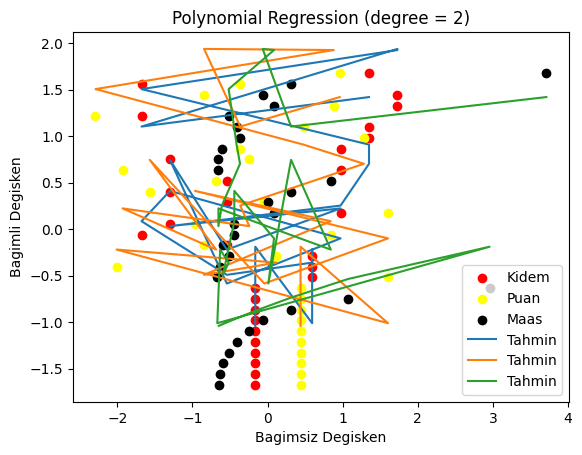

In [209]:
# Polynomial Regression Predict (degree= 2)
plt.scatter(X[:,0:1],Y,color='red',label='Kidem')
plt.scatter(X[:,1:2],Y,color='yellow',label='Puan')
plt.scatter(X[:,2:],Y,color='black',label='Maas')
plt.plot(X,lr.predict(X_pol),label='Tahmin')
plt.legend()
plt.xlabel('Bagimsiz Degisken')
plt.ylabel('Bagimli Degisken')
plt.title('Polynomial Regression (degree = 2)')
plt.show()

In [210]:
# Polynoimal olarak veriyi egit (derece= 4)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
lr1 = LinearRegression()
pol = PolynomialFeatures(degree = 4)
X_pol = pol.fit_transform(X)
lr1.fit(X_pol,Y)

LinearRegression()

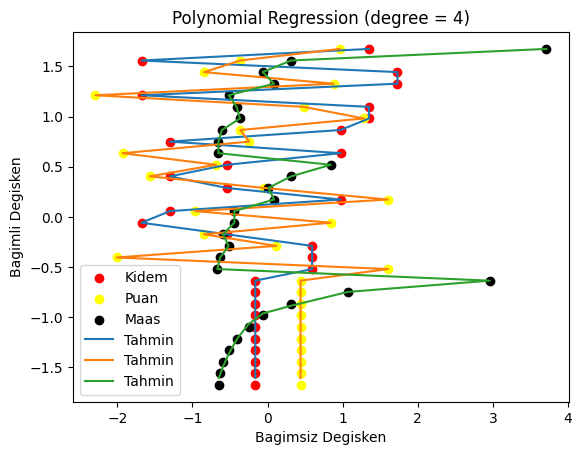

In [211]:
# Polynomial Regression Predict (degree= 4)
plt.scatter(X[:,0:1],Y,color='red',label='Kidem')
plt.scatter(X[:,1:2],Y,color='yellow',label='Puan')
plt.scatter(X[:,2:],Y,color='black',label='Maas')
plt.plot(X,lr1.predict(X_pol),label='Tahmin')
plt.legend()
plt.xlabel('Bagimsiz Degisken')
plt.ylabel('Bagimli Degisken')
plt.title('Polynomial Regression (degree = 4)')
plt.show()

In [212]:
# DecisionTree olarak veriyi egit 
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(random_state=0)
model1.fit(X,Y)

DecisionTreeRegressor(random_state=0)

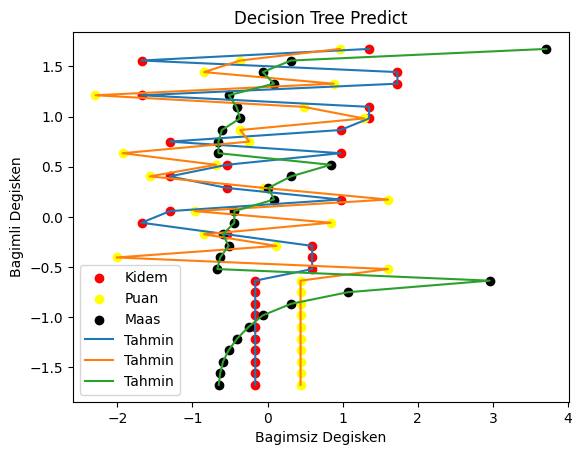

In [213]:
# Decision Tree Predict
plt.scatter(X[:,0:1],Y,color='red',label='Kidem')
plt.scatter(X[:,1:2],Y,color='yellow',label='Puan')
plt.scatter(X[:,2:],Y,color='black',label='Maas')
plt.plot(X,model1.predict(X),label='Tahmin')
plt.legend()
plt.xlabel('Bagimsiz Degisken')
plt.ylabel('Bagimli Degisken')
plt.title('Decision Tree Predict')
plt.show()

In [214]:
# Randomforest olarak veriyi egit
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=0)
model2.fit(X,Y.ravel())

RandomForestRegressor(random_state=0)

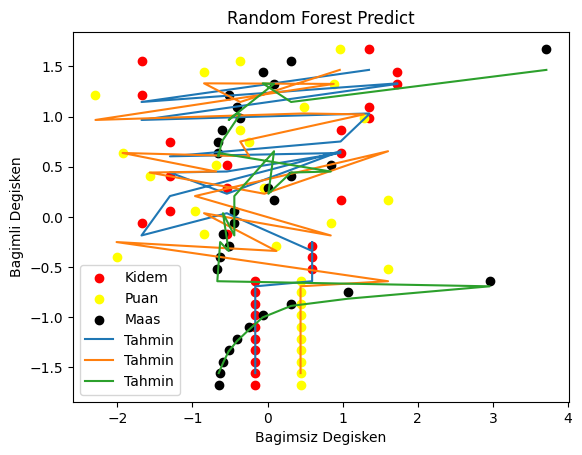

In [215]:
# Random Forest Predict
plt.scatter(X[:,0:1],Y,color='red',label='Kidem')
plt.scatter(X[:,1:2],Y,color='yellow',label='Puan')
plt.scatter(X[:,2:],Y,color='black',label='Maas')
plt.plot(X,model2.predict(X),label='Tahmin')
plt.legend()
plt.xlabel('Bagimsiz Degisken')
plt.ylabel('Bagimli Degisken')
plt.title('Random Forest Predict')
plt.show()

In [216]:
# R2 Square error kutuphanesini yukle 
from sklearn.metrics import r2_score

In [217]:
# Polynomial R2 Squared (degree= 4)
poly_error = r2_score(Y,lr1.predict(X_pol))
print(f'Polynomial R Squared Error: {poly_error}')

Polynomial R Squared Error: 0.9996532614727345


In [218]:
# Decision Tree R2 Squared 
dectree_error = r2_score(Y,model1.predict(X))
print(f'DecisionTree R Squared Error: {dectree_error}')

DecisionTree R Squared Error: 1.0


In [219]:
# Random Forest R2 Squared
randfore_error = r2_score(Y,model2.predict(X))
print(f'RandomForest R Squared Error: {randfore_error}')

RandomForest R Squared Error: 0.9760357730812013
